In [63]:

%pip install beautifulsoup4
%pip install lxml
%pip install cloudscraper
%pip install selenium
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


In [64]:
%pip install pil

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


## 1. Clean data

In [65]:
import re
import os

def clean_wikipedia_text(text):
    # Remove citations like [1], [2][3], [citation needed]
    text = re.sub(r'\[\d+(?:,\d+)*\]|\[citation needed\]', '', text)
    
    # Correct incorrectly escaped HTML entities like `&lt;` and `&gt;`
    text = re.sub(r'&lt;', '<', text)
    text = re.sub(r'&gt;', '>', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove parenthetical information
    text = re.sub(r'\([^)]*\)-', '', text)
    
    # Remove special formatting (e.g., ''italic'', """bold""" or similar)
    text = re.sub(r"''+|\"\"+|'''", '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove lines starting with special characters (-, *, digits, or #)
    text = '\n'.join(
        line for line in text.splitlines()
        if not re.match(r'^(\s*[-*#]|\s*\d+\.)', line.strip())
    )
    
    return text


# Ensure the output directory exists
os.makedirs('data_clean', exist_ok=True)

# Load text, clean, and save the output
input_file = 'data.txt'
output_file = 'cleaned_wiki_text.txt'

try:
    with open(input_file, 'r', encoding='utf-8') as file:
        raw_text = file.read()
    
    cleaned_text = clean_wikipedia_text(raw_text)
    
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(cleaned_text)
    
    print(f"Cleaned text saved to {output_file}.")
except FileNotFoundError:
    print(f"Error: Input file '{input_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Cleaned text saved to cleaned_wiki_text.txt.


In [66]:
with open('cleaned_wiki_text.txt', 'r', encoding='utf-8') as f:
    text = f.read().replace('\n', '')
    
print(text)


Sport is a form of physical activity or game. Often competitive and organized, sports use, maintain, or improve physical ability and skills. They also provide enjoyment to participants and, in some cases, entertainment to spectators. Many sports exist, with different participant numbers, some are done by a single person with others being done by hundreds. Most sports take place either in teams or competing as individuals. Some sports allow a "tie" or "draw", in which there is no single winner; others provide tie-breaking methods to ensure one winner. A number of contests may be arranged in a tournament format, producing a champion. Many sports leagues make an annual champion by arranging games in a regular sports season, followed in some cases by playoffs. Sport is generally recognised as system of activities based in physical athleticism or physical dexterity, with major competitions admitting only sports meeting this definition. Some organisations, such as the Council of Europe, prec

In [67]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PCN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [68]:
from nltk.tokenize import sent_tokenize, word_tokenize

sentences = sent_tokenize(text)
print(len(sentences))

1024


## 2. Split text to three part
- 70% for train
- 10% for validation
- 20% for test

In [69]:
train_size = int(len(sentences) * 0.7)
valid_size = int(len(sentences) * 0.1)

train = sentences[:train_size]
valid = sentences[train_size:train_size + valid_size]
test = sentences[train_size + valid_size:]

print(len(train), len(valid), len(test))

716 102 206


In [70]:
tokens = word_tokenize(' '.join(train))
print(tokens)
print(len(tokens))

['Sport', 'is', 'a', 'form', 'of', 'physical', 'activity', 'or', 'game', '.', 'Often', 'competitive', 'and', 'organized', ',', 'sports', 'use', ',', 'maintain', ',', 'or', 'improve', 'physical', 'ability', 'and', 'skills', '.', 'They', 'also', 'provide', 'enjoyment', 'to', 'participants', 'and', ',', 'in', 'some', 'cases', ',', 'entertainment', 'to', 'spectators', '.', 'Many', 'sports', 'exist', ',', 'with', 'different', 'participant', 'numbers', ',', 'some', 'are', 'done', 'by', 'a', 'single', 'person', 'with', 'others', 'being', 'done', 'by', 'hundreds', '.', 'Most', 'sports', 'take', 'place', 'either', 'in', 'teams', 'or', 'competing', 'as', 'individuals', '.', 'Some', 'sports', 'allow', 'a', '``', 'tie', "''", 'or', '``', 'draw', "''", ',', 'in', 'which', 'there', 'is', 'no', 'single', 'winner', ';', 'others', 'provide', 'tie-breaking', 'methods', 'to', 'ensure', 'one', 'winner', '.', 'A', 'number', 'of', 'contests', 'may', 'be', 'arranged', 'in', 'a', 'tournament', 'format', ',', 

In [71]:
from collections import Counter

size_token = len(tokens)

word_freq = Counter(tokens).most_common(int(size_token*0.95))
unique_words_count = len(set(tokens))
print(f"Number of unique tokens: {unique_words_count}")
print(len(word_freq))

vocab = [w for w, _ in word_freq]
print(vocab)


new_tokens = [_ if _ in vocab else '<unk>' for _ in tokens]
print(new_tokens)

Number of unique tokens: 4298
4298
[',', 'the', '.', 'of', 'and', 'to', 'in', 'a', 'is', 'as', 'by', 'history', 'The', 'or', 'with', '(', ')', 'was', 'Cambodia', 'that', 'on', 'from', 'for', "'s", 'sports', '``', "''", 'are', 'In', 'which', 'sport', 'an', 'has', ':', 'such', 'their', 'also', 'It', 'other', 'be', 'have', 'historical', 'can', 'events', 'it', 'were', 'Khmer', 'at', 'this', 'past', 'its', 'been', 'not', 'historians', 'History', 'century', 'but', 'most', 'into', 'Cambodian', 'during', 'human', 'some', 'A', 'about', 'study', '[', ']', 'sources', 'people', 'evidence', 'used', 'his', 'Main', 'how', 'country', 'Rouge', 'including', 'often', 'what', 'between', 'modern', 'general', 'Sihanouk', 'Hun', ';', 'source', 'while', 'article', 'social', 'years', 'use', 'international', 'all', 'For', 'period', 'Sen', 'Some', 'they', 'first', 'many', 'ancient', 'under', 'power', 'Vietnamese', 'one', 'major', 'through', 'world', 'part', 'participation', 'these', 'early', 'when', 'World', 'le

## 3. Count n-gram

In [72]:
from nltk.util import ngrams
from collections import defaultdict

# Count n-grams
def count_ngrams_from_tokens(tokens, n):
    ngram_counts = defaultdict(int)
    
    # Generate n-grams directly from the tokens
    for ngram in ngrams(tokens, n):
        # For unigrams, store the token itself instead of a tuple
        if n == 1:
            ngram_counts[ngram[0]] += 1
        else:
            ngram_counts[ngram] += 1
    
    return ngram_counts


# Example training data (list of tokens)
# new_tokens = [
#     "Sport", "is", "a", "form", "of", "physical", "activity", "or", "game", "Sport", "is", "a", "form", "of", "history"
# ]

# Count n-grams
unigram_counts = count_ngrams_from_tokens(new_tokens, 1)
bigram_counts = count_ngrams_from_tokens(new_tokens, 2)
trigram_counts = count_ngrams_from_tokens(new_tokens, 3)
fourgram_counts = count_ngrams_from_tokens(new_tokens, 4)

# Print the results
print("Unigrams:", dict(unigram_counts))
print("Bigrams:", dict(bigram_counts))
print("Trigrams:", dict(trigram_counts))
print("Fourgrams:", dict(fourgram_counts))


Unigrams: {'Sport': 9, 'is': 179, 'a': 300, 'form': 11, 'of': 686, 'physical': 15, 'activity': 7, 'or': 119, 'game': 5, '.': 712, 'Often': 2, 'competitive': 7, 'and': 556, 'organized': 6, ',': 1059, 'sports': 77, 'use': 18, 'maintain': 1, 'improve': 4, 'ability': 1, 'skills': 3, 'They': 5, 'also': 46, 'provide': 10, 'enjoyment': 2, 'to': 360, 'participants': 12, 'in': 356, 'some': 24, 'cases': 3, 'entertainment': 2, 'spectators': 3, 'Many': 3, 'exist': 1, 'with': 107, 'different': 15, 'participant': 2, 'numbers': 1, 'are': 69, 'done': 2, 'by': 145, 'single': 5, 'person': 5, 'others': 7, 'being': 11, 'hundreds': 2, 'Most': 4, 'take': 5, 'place': 6, 'either': 6, 'teams': 5, 'competing': 3, 'as': 172, 'individuals': 3, 'Some': 17, 'allow': 3, '``': 73, 'tie': 1, "''": 72, 'draw': 1, 'which': 61, 'there': 14, 'no': 8, 'winner': 2, ';': 19, 'tie-breaking': 1, 'methods': 6, 'ensure': 5, 'one': 16, 'A': 24, 'number': 8, 'contests': 2, 'may': 14, 'be': 40, 'arranged': 1, 'tournament': 2, 'form

#### Write n-gram count to file csv

In [73]:
import os
import csv

# Define a function to save n-gram counts to a CSV file
def save_ngram_counts_to_csv(ngram_counts, output_file):

    with open(output_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        # Write the header
        writer.writerow(['word', 'count'])
        # Write each n-gram and its count
        for ngram, count in ngram_counts.items():
            ngram_str = ' '.join(str(token) for token in ngram if token is not None)
            writer.writerow([ngram_str, count])

# Save n-gram counts to CSV files
output_dir = "LM1_ngram_counts"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save each n-gram count to its respective CSV file
save_ngram_counts_to_csv(unigram_counts, os.path.join(output_dir, "unigram_counts.csv"))
save_ngram_counts_to_csv(bigram_counts, os.path.join(output_dir, "bigram_counts.csv"))
save_ngram_counts_to_csv(trigram_counts, os.path.join(output_dir, "trigram_counts.csv"))
save_ngram_counts_to_csv(fourgram_counts, os.path.join(output_dir, "fourgram_counts.csv"))

# Confirm the operation
print(f"N-gram counts saved as CSV files to '{output_dir}' directory.")


N-gram counts saved as CSV files to 'LM1_ngram_counts' directory.


### 4. Define Backoff Model

In [74]:
%pip install opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


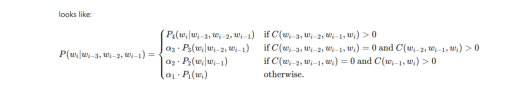

In [75]:
import cv2
from matplotlib import pyplot as plt

# Read the image using OpenCV
img = cv2.imread('ngram_backoff_form.png')

# Convert the image from BGR (OpenCV default) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [99]:
from collections import defaultdict
import math

class BackoffModel:
    def __init__(self, unigram_counts, bigram_counts, trigram_counts, fourgram_counts):
        self.unigram_counts = unigram_counts
        self.bigram_counts = bigram_counts
        self.trigram_counts = trigram_counts
        self.fourgram_counts = fourgram_counts
        self.total_ungrams = sum(unigram_counts.values()) 
        
    def probability(self, w4, w3=None, w2=None, w1=None):
        if w1 and w2 and w3:
            fourgram = (w1, w2, w3, w4)
            # print(f"Checking 4-gram: {fourgram}")
            if self.fourgram_counts.get(fourgram, 0) > 0:
                # print(f"4-gram found: {fourgram} with count {self.fourgram_counts[fourgram]}")
                return self.fourgram_counts[fourgram] / self.trigram_counts.get((w1, w2, w3), 1)
        
        if w2 and w3:
            trigram = (w2, w3, w4)
            # print(f"Checking 3-gram: {trigram}")
            if self.trigram_counts.get(trigram, 0) > 0:
                # print(f"3-gram found: {trigram} with count {self.trigram_counts[trigram]}")
                return self.trigram_counts[trigram] / self.bigram_counts.get((w2, w3), 1)
        
        if w3:
            bigram = (w3, w4)
            # print(f"Checking 2-gram: {bigram}")
            if self.bigram_counts.get(bigram, 0) > 0:
                # print(f"2-gram found: {bigram} with count {self.bigram_counts[bigram]}")
                return self.bigram_counts[bigram] / self.unigram_counts.get(w3, 1)
        
        # print(f"Checking 1-gram: {w4}")
        if self.unigram_counts.get(w4, 0) > 0:
            # print(f"1-gram found: {w4} with count {self.unigram_counts[w4]}")
            return self.unigram_counts[w4] / self.total_ungrams  # Use the corrected attribute
        
        # print("No matching n-grams found.")
        return 1e-08


    def calculate_perplexity(self, test_data, n=4):

        total_log_prob = 0
        word_count = 0

        for sentence in test_data:
            # Add padding for n-grams
            tokens = ["<s>"] * (n - 1) + sentence.split() + ["</s>"]
            for i in range(n - 1, len(tokens)):
                # Extract the current n-gram
                w4 = tokens[i]
                w3 = tokens[i - 1] if i - 1 >= 0 else None
                w2 = tokens[i - 2] if i - 2 >= 0 else None
                w1 = tokens[i - 3] if i - 3 >= 0 else None

                # Calculate probability using backoff
                prob = self.probability(w4, w3, w2, w1)

                # Avoid log(0) by applying a very small probability
                if prob > 0:
                    total_log_prob += math.log(prob, 2)
                else:
                    total_log_prob += -float("inf")  # Handle zero probabilities
                word_count += 1

        # Compute perplexity
        perplexity = 2 ** (-total_log_prob / word_count)
        return perplexity





In [88]:
# Initialize BackoffModel
backoff_model = BackoffModel(unigram_counts, bigram_counts, trigram_counts, fourgram_counts)

# Calculate Perplexity
perplexity = backoff_model.calculate_perplexity(test, n=4)
print(f"Perplexity: {perplexity}")


4-gram found: ('by', 'the', 'Ministry', 'of') with count 1
4-gram found: ('effects', 'of', 'climate', 'change') with count 1
4-gram found: ('the', 'Kingdom', 'of', 'Cambodia') with count 1
4-gram found: ('in', 'the', 'Greater', 'Mekong') with count 1
4-gram found: ('in', 'Phnom', 'Penh', 'where') with count 1
4-gram found: ('of', 'the', 'Mekong', 'River') with count 1
4-gram found: ('the', 'time', 'of', 'the') with count 1
4-gram found: ('is', 'a', 'member', 'of') with count 4
4-gram found: ('a', 'member', 'of', 'the') with count 3
4-gram found: ('Cambodia', 'is', 'a', 'member') with count 3
4-gram found: ('is', 'a', 'member', 'of') with count 4
4-gram found: ('one', 'of', 'the', 'most') with count 1
4-gram found: ('according', 'to', 'the', 'Cambodia') with count 1
4-gram found: ('and', 'the', 'development', 'of') with count 2
4-gram found: ('Prime', 'Minister', 'Hun', 'Sen') with count 5
4-gram found: ('at', 'the', 'end', 'of') with count 2
4-gram found: ('the', 'end', 'of', 'the') wi

### 4. Define Interpolation with Add-k Smothing

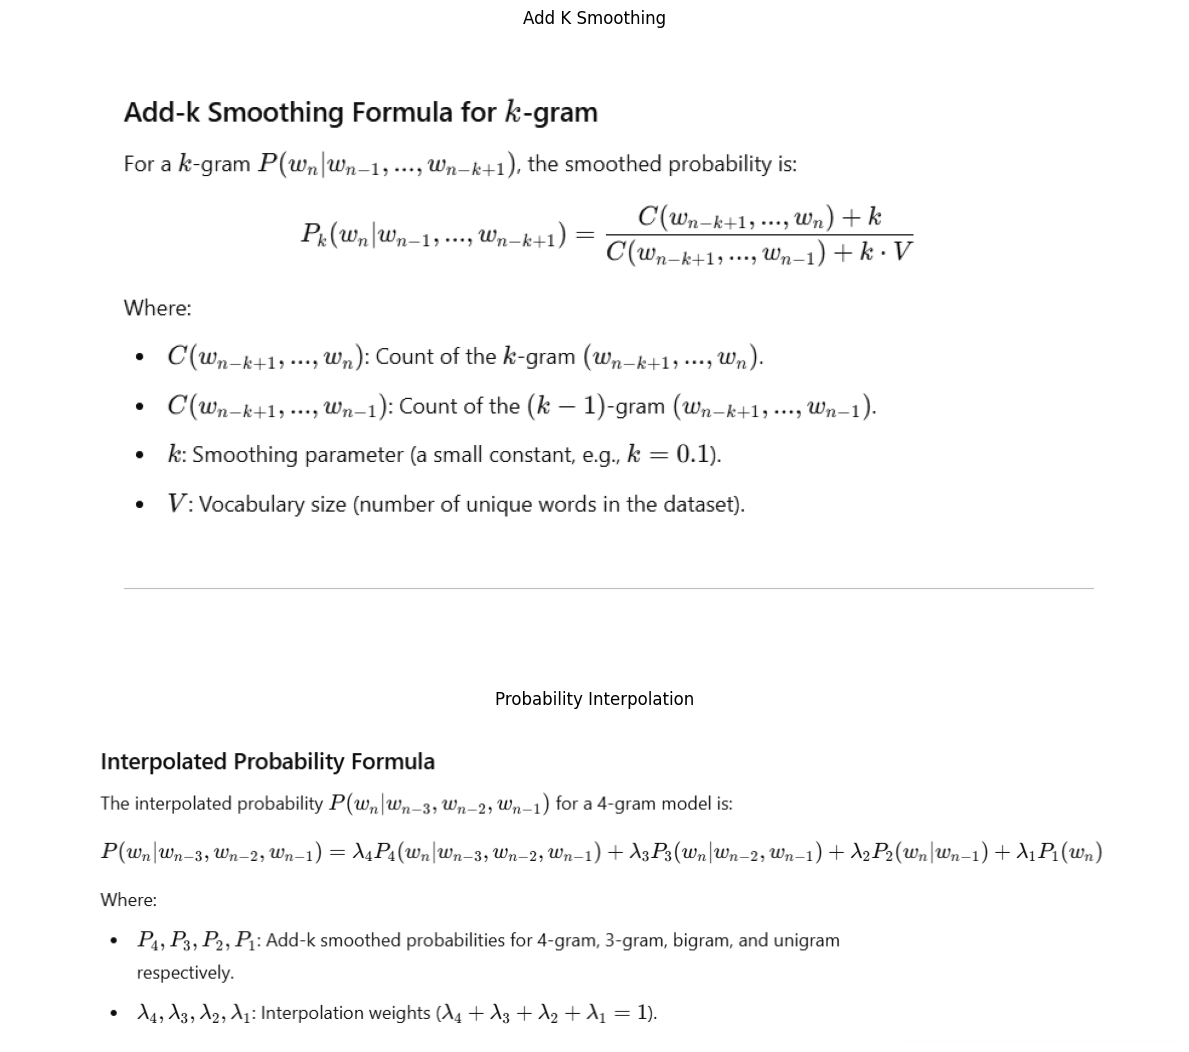

In [78]:
import cv2
from matplotlib import pyplot as plt

# Read the images using OpenCV
img1 = cv2.imread('add-k-smoothing.png')
img2 = cv2.imread('probability_interpolation.png')

# Convert the images from BGR (OpenCV default) to RGB
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a subplot to display both images in two rows
plt.figure(figsize=(12, 12))  # Set the figure size for larger images

plt.subplot(2, 1, 1)  # (rows, columns, index)
plt.imshow(img_rgb1)
plt.title('Add K Smoothing')
plt.axis('off')  # Hide axes

plt.subplot(2, 1, 2)  # (rows, columns, index)
plt.imshow(img_rgb2)
plt.title('Probability Interpolation')
plt.axis('off')  # Hide axes

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [100]:
from collections import defaultdict
from nltk.util import ngrams

class InterpolationModel:
    def __init__(self, unigram_counts, bigram_counts, trigram_counts, fourgram_counts, vocab_size, smoothing_k=1):
        self.unigram_counts = unigram_counts
        self.bigram_counts = bigram_counts
        self.trigram_counts = trigram_counts
        self.fourgram_counts = fourgram_counts
        self.vocab_size = vocab_size
        self.smoothing_k = smoothing_k
        self.total_unigrams = sum(unigram_counts.values())

        # Interpolation weights (can be tuned)
        self.lambda_4 = 0.4
        self.lambda_3 = 0.3
        self.lambda_2 = 0.2
        self.lambda_1 = 0.1

    def add_k_smoothing(self, count, total, k, vocab_size):
        """Apply Add-k smoothing to calculate probabilities."""
        return (count + k) / (total + k * vocab_size)

    def probability(self, w4, w3=None, w2=None, w1=None):
        # 4-gram probability
        if w1 and w2 and w3:
            fourgram = (w1, w2, w3, w4)
            fourgram_count = self.fourgram_counts.get(fourgram, 0)
            trigram_count = self.trigram_counts.get((w1, w2, w3), 0)
            prob_4gram = self.add_k_smoothing(fourgram_count, trigram_count, self.smoothing_k, self.vocab_size)
            
        else:
            prob_4gram = 0

        # 3-gram probability
        if w2 and w3:
            trigram = (w2, w3, w4)
            trigram_count = self.trigram_counts.get(trigram, 0)
            bigram_count = self.bigram_counts.get((w2, w3), 0)
            prob_3gram = self.add_k_smoothing(trigram_count, bigram_count, self.smoothing_k, self.vocab_size)
        else:
            prob_3gram = 0

        # 2-gram probability
        if w3:
            bigram = (w3, w4)
            bigram_count = self.bigram_counts.get(bigram, 0)
            unigram_count = self.unigram_counts.get(w3, 0)
            prob_2gram = self.add_k_smoothing(bigram_count, unigram_count, self.smoothing_k, self.vocab_size)
        else:
            prob_2gram = 0

        # 1-gram probability
        unigram_count = self.unigram_counts.get(w4, 0)
        prob_1gram = self.add_k_smoothing(unigram_count, self.total_unigrams, self.smoothing_k, self.vocab_size)

        # Interpolation
        interpolated_prob = (
            self.lambda_4 * prob_4gram +
            self.lambda_3 * prob_3gram +
            self.lambda_2 * prob_2gram +
            self.lambda_1 * prob_1gram
        )

        return interpolated_prob
    
    def calculate_perplexity(self, test_data, n=4):

        total_log_prob = 0
        word_count = 0

        for sentence in test_data:
            # Add padding for n-grams
            tokens = ["<s>"] * (n - 1) + sentence.split() + ["</s>"]
            for i in range(n - 1, len(tokens)):
                # Extract the current n-gram
                w4 = tokens[i]
                w3 = tokens[i - 1] if i - 1 >= 0 else None
                w2 = tokens[i - 2] if i - 2 >= 0 else None
                w1 = tokens[i - 3] if i - 3 >= 0 else None

                # Calculate probability
                prob = self.probability(w4, w3, w2, w1)

                # Avoid log(0) by applying a very small probability
                if prob > 0:
                    total_log_prob += math.log(prob, 2)
                else:
                    total_log_prob += -float("inf")  # Handle zero probabilities
                word_count += 1

        # Compute perplexity
        perplexity = 2 ** (-total_log_prob / word_count)
        return perplexity

vocab_size = len(set(new_tokens))
# # Train the model
# smoothing_k = 0.1  # Add-k smoothing constant
# model = InterpolationModel(unigram_counts, bigram_counts, trigram_counts, fourgram_counts, vocab_size, smoothing_k)

# # Test the model
# prob = model.probability("enjoyment", "provide", "also", "they")
# print(f"Probability: {prob}")

In [96]:
smoothing_k = 0.1  # Add-k smoothing constant
model = InterpolationModel(unigram_counts, bigram_counts, trigram_counts, fourgram_counts, vocab_size, smoothing_k)

# Calculate Perplexity
perplexity = model.calculate_perplexity(test, n=4)
print(f"Perplexity: {perplexity}")

Perplexity: 1909.310524976894


### 6. Evaluate Models with Perplexity

In [107]:
# Initialize BackoffModel
backoff_model = BackoffModel(unigram_counts, bigram_counts, trigram_counts, fourgram_counts)
# Calculate Perplexity
perplexity = backoff_model.calculate_perplexity(test, n=4)
print(f"Perplexity LM1: {perplexity}")

smoothing_k = 0.1  # Add-k smoothing constant
interpolation_model = InterpolationModel(unigram_counts, bigram_counts, trigram_counts, fourgram_counts, vocab_size, smoothing_k)

# Calculate Perplexity
perplexity = model.calculate_perplexity(test, n=4)
print(f"Perplexity LM2: {perplexity}")



Perplexity LM1: 29806.675208660345
Perplexity LM2: 1909.310524976894


### 7. Generate Text

In [108]:
import random

def generate_text(model, seed, max_length=20, n=4):
    generated = seed[:]
    while len(generated) < max_length:
        # Get the current context for prediction
        context = generated[-(n - 1):]
        if len(context) < (n - 1):
            context = ["<s>"] * ((n - 1) - len(context)) + context

        # Predict the next word
        candidates = []
        probabilities = []
        for word in model.unigram_counts.keys():
            prob = model.probability(word, *context[-3:])
            candidates.append(word)
            probabilities.append(prob)

        # Normalize probabilities
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]

        # Sample the next word
        next_word = random.choices(candidates, probabilities, k=1)[0]
        if next_word == "</s>":
            break
        generated.append(next_word)

    return " ".join(generated)


#### BackoffModel and InterpolationModel Text generate

In [ ]:

seed = ["The", "sports", "team"]

# Generate text using BackoffModel
generated_text_backoff = generate_text(backoff_model, seed, max_length=20, n=4)
print("Generated Text (BackoffModel):", generated_text_backoff)

# Generate text using InterpolationModel
generated_text_interpolation = generate_text(interpolation_model, seed, max_length=20, n=4)
print("Generated Text (InterpolationModel):", generated_text_interpolation)

Generated Text (BackoffModel): The sports team regime articles of in : a biodiversity to disability , enhance use the social of partisan classes


#### InterpolationModel

Generated Text (InterpolationModel): The sports team archaeology classroom bad six journals . treated route participants thematically d authenticity then ideas Estimates first or
